#  Group Lab 10 

## Multiple Linear Regression

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf

<hr>

## <u>Case Study</u>: Seattle Airbnb

We will analyze the seattle_airbnb_listings_cleaned.csv dataset located in this folder.  This dataset contains listings from the five most popular Seattle neighborhoods (for Airbnb listings) that are either houses or apartments.  The dataset contains the following variables:

**Listing Information**
The dataset contains the following information about the Airbnb *listing*:
* <u>price</u>: price of the listing (per night) (in US dollars)
* <u>review_scores_rating</u>: the average rating of the listing [0,100] (100 is the best)
* <u>number_of_reviews</u>: the number of reviews for the listing
* <u>security_deposit</u>: the security deposit required for the listing (in US dollars)
* <u>cleaning_fee</u>: the cleaning fee required for the listing (in US dollars)
* <u>neighborhood</u>: the neighborhood of Seattle the listing is located in
* <u>property_type</u>: is the listing in a 'House' or 'Apartment'
* <u>room_type</u>: is the listing a 'Entire home/apt', 'Private room', or 'Shared room'
* <u>accommodates</u>: how many guests will the listing accommodate
* <u>bathrooms</u>: how many bathrooms does the listing have
* <u>beds</u>: how many beds does the listing have

**Host Information**
The dataset also contains the following information about the *host* of the given Airbnb listing:
* <u>host_is_superhost</u>: is the host a "superhost": t=True, f=False
* <u>host_has_profile_pic</u>: does the host have a profile pic in their bio: t=True, f=False
* <u>host_response_time</u>: how fast will the host respond to requests (on average)
* <u>host_acceptance_rate</u>: what percent of booking requests will the host accept

Below, we read in the Airbnb data as df.

In [2]:
df = pd.read_csv('seattle_airbnb_listings_cleaned.csv')
df.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,1,t,t,t
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,1,f,t,t
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,1,f,t,t
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,1,t,t,t
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,1,t,t,t


### 1.  Visualizations

For this question, you will consider the neighborhood of the Airbnb listings.  Select one other variable in the dataset to analyze in relationship to the neighborhood of the Airbnb listing.  

For this question, you will need to perform the following tasks.  These tasks are somewhat open-ended, so you should make the appropriate decisions about how to complete these tasks.

**a)**  What other variable did you select?  What is its variable type?

'price'

quantitative varaible

**b)**  Generate a graph to visualize the two variables of interest.  Make sure that your graph is clear & has appropriate labels.

In [3]:
df['neighborhood'].unique()

array(['Wallingford', 'Minor', 'Belltown', 'Broadway', 'Fremont'],
      dtype=object)

Text(0.5, 1.0, 'Price of airbnbs by the neighborhoods in Seattle ')

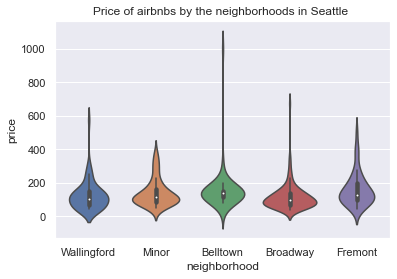

In [5]:
sns.violinplot(x='neighborhood', y = 'price', data = df)
plt.title("Price of airbnbs by the neighborhoods in Seattle ")

**c)**  Calculate at least one summary statistic for your variable of interest overall.  Then, repeat this calculation for each of the neighborhoods separately in the dataset.  Perform this second set of calculations in one line of code.  *Hint: consider our Python function of the week for this question.*

In [7]:
print('The median price of the whole data is',df['price'].median())

The median price of the whole data is 115.0


In [13]:
df['price'].groupby(df['neighborhood']).median()

neighborhood
Belltown       139.0
Broadway        98.5
Fremont        125.0
Minor          114.0
Wallingford    104.5
Name: price, dtype: float64

**d)**  Interpret your results.  In general, what conclusions can you draw from these descriptive summaries of the data?  What do you notice from the graph & the summary statistics?

The median price of all neighborhoods in the dataset is 115. When I plotted a violin plot to compare the median price and spread of price of neighborhoods, I could not see the big difference in a median value. But, I could see noticeable difference in the spread, Belltown neighborhood had a big spread in price. 

When I calculated median price for each neighborhoods, three neighborhoods (Broadway and Minor and Wallingford) had lower median price than the median of entire data (115) and the others had higher median price than 115. 

I can conclude the median price is fairly similar to each other but some neighborhoods (especially Belltown) have big difference of price of airbnbs within a neighborhood. 

### 2.  Understanding the Price of a Listing 

How much does an airbnb listing cost in Seattle?  For this problem, we will use regression to understand airbnb prices.

**a)** Fit a model to predict the price from the neighborhood, the property type, the average rating, the interaction of the neighborhood and the average rating, and **one other variable of your choosing**.  Print the summary of this model.

In [15]:
df.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,1,t,t,t
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,1,f,t,t
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,1,f,t,t
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,1,t,t,t
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,1,t,t,t


In [25]:
results = smf.ols('price ~ neighborhood + property_type + review_scores_rating + review_scores_rating * neighborhood + accommodates' , data = df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     24.83
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           4.33e-37
Time:                        16:18:22   Log-Likelihood:                -1912.7
No. Observations:                 339   AIC:                             3849.
Df Residuals:                     327   BIC:                             3895.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                          100.5346     84.595      1.188      0.236     -65.884     266.953
neighborhood[T.Broadway]                          -144.0892    116.203     -1.240      0.216    -372.688      84.510
neighborhood[T.Fremont]                            284.0027    253.609      1.120      0.264    -214.908     782.914
neighborhood[T.Minor]                             -339.5445    188.443     -1.802      0.072    -710.257      31.168
neighborhood[T.Wallingford]                       -255.2689    177.598     -1.437      0.152    -604.647      94.109
property_type[T.House]                              16.7802      9.115      1.841      0.067      -1.151      34.711
review_scores_rating                                -0.3809      0.882     -0.432      0.666      -2.116       1.354
review_scores_rating:neighborhood[T.Broadway]        1.1291      1.228      0.920      0.358      -1.286       3.544
review_scores_rating:neighborhood[T.Fremont]        -3.3246      2.659     -1.250      0.212      -8.556       1.907
review_scores_rating:neighborhood[T.Minor]           3.0536      1.950      1.566      0.118      -0.782       6.889
review_scores_rating:neighborhood[T.Wallingford]     2.1156      1.867      1.133      0.258      -1.558       5.789
accommodates                                        28.0640      1.840     15.251      0.000      24.444      31.684
==============================================================================
Omnibus:                      425.829   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56758.032
Skew:                           5.568   Prob(JB):                         0.00
Kurtosis:                      65.404   Cond. No.                     7.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**b)** What is the baseline level for this model?

We are predicting a price of airbnb from this model and the baseline level of this model is a property in neighborhood 'Belltown', which type is an 'Apartment'.

**c)** What is the slope for the average rating for a listing in the Belltown neighborhood?  What about for the average rating for a listing in the Minor neighborhood?

In [26]:
# the slope for the avg rating for a listing in the Belltown neighborhood

-0.3809

-0.3809

In [27]:
# the avg rating for a listin in the Minor neighborhood

-0.3809 + 3.0536

2.6727

### 3.  Significance of Regression Test

Perform a significance of regression test for the model fit in Question 2.

**a)**  What are the hypotheses for the significance of regression test for the model from Question 2?

H_0 (null hypothesis) : all of the slopes are equal to 0. 

H_A (alternative hypothesis) : at least one of the slopes is not equal to 0. 

(there are 11 slopes in my model.)

**b)**  What is the test statistic and *p*-value for the significance of regression test?

The output summary table tells us that test statistic (F-statistic) is 24.83.

I should use this test statistic and the F-distribution to calculate the p-value for this test.

The two sets of degrees of freedom for this test are:

df1 = p = number of slopes = 11

df2 = n - p - 1 = 339 - 11 - 1 = 327

In [28]:
from scipy.stats import f
pvalue = 1 - f.cdf(2.377, dfn = 11, dfd = 327)
print('p-value: ', pvalue)

p-value:  0.007705087775677244


**c)**  What decision would you make for this test at a significance level of 10%?

Because p-value is 0.0077, and alpha is 0.1, we reject the null hypothesis. 

Thus there is sufficient evidence to suggest that at least one of 11 population slopes in the model predicting price with the neighborhood, the property type, the average rating, the interaction of the neighborhood and the average rating, and the accommodates is non-zero. 

<hr>

## <u>Project Preparation</u>:

Lab 10 is our last group lab assignment.  After this week, you will begin focusing on our final course project in lab.

As we begin to shift our attention to the final group project, there are two decisions for you to start thinking about:

1. Group Formation: You may complete the final project **individually**, or you may work in **groups of up to 3 students** (you and two classmates).  I strongly encourage forming groups within labs.  If you plan to form groups with members enrolled in different labs, you will need permission from all of your lab TAs, along with an email to all lab TAs and to Julie about lab presentations in the last lab of the semester.  This needs to be done by 4/19.
2. Data Selection:  I strongly encourage you to select your own dataset for this project.  Your dataset must include at least five informative variables, of which one must be categorical and one must be quantitative.  Examples of uninformative variables include row labels, names for each row, row indicators, and row totals.  Your data should also be a sample from a population, although you could perform the sampling yourself if you locate population data.  A few datasets will be provided for you later if you cannot find a dataset that you are interested in.

I encourage you to start discussing these questions with others in your lab this week as you begin making plans for the end of the semester.